Redes de cascada-correlación
===

* 41:42 min | Última modificación: Mayo 31, 2021 | [YouTube]

In [1]:
import warnings

warnings.filterwarnings("ignore")

## Definición

En este tipo de red neuronal, cada neurona de la capa oculta tiene conexiones hacia cada una de las neuronas ocultas siguientes (hacia delante) formando una "cascada".

![assets/som.png](assets/cascade-correlation.png)

## Caso de aplicación

In [2]:
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/concrete.csv",
    sep=",",  
    thousands=None,
    decimal=".",
)  

df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Preparación de los datos

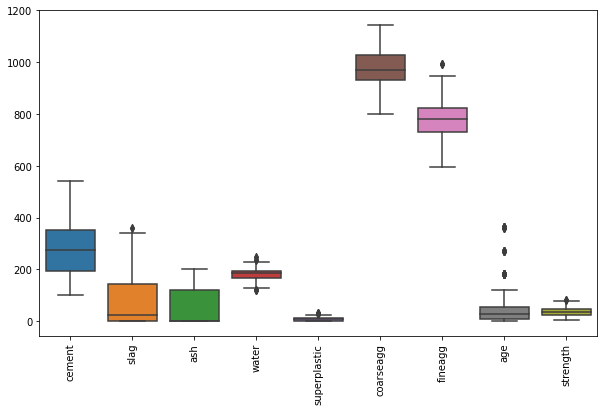

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#
# Los rangos de las variables numéricas son
# bastantes diferentes
#
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90);

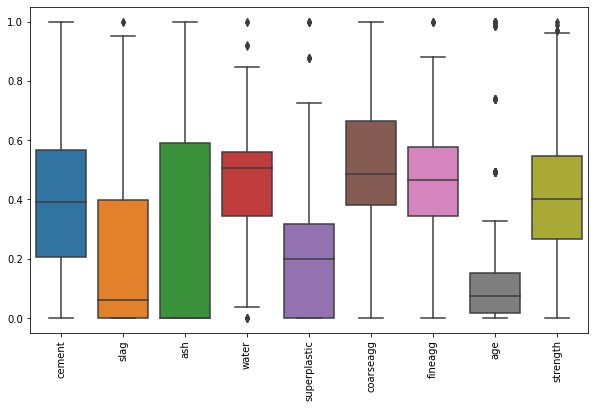

In [4]:
from sklearn.preprocessing import MinMaxScaler

#
#  Se escalan todas las variables al rango [0, 1]
#  para evitar problemas asociados a la escala
#
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_norm)
plt.xticks(rotation=90);

## Modelo

In [5]:
df_norm.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176,0.967485
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176,0.741996
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011,0.472655
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000,0.482372
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264,0.522860


In [6]:
import tensorflow as tf

X_train = df_norm.copy()
y_train_true = X_train.pop("strength")

dataset_train = tf.data.Dataset.from_tensor_slices(
    (X_train.values, y_train_true.values)
).batch(1)

for feat, targ in dataset_train.take(5):
    print ('Features: {}, Target: {}'.format(feat, targ))

Features: [[1.         0.         0.         0.32108626 0.07763975 0.69476744
  0.20572002 0.07417582]], Target: [0.96748474]
Features: [[1.         0.         0.         0.32108626 0.07763975 0.73837209
  0.20572002 0.07417582]], Target: [0.74199576]
Features: [[0.52625571 0.39649416 0.         0.84824281 0.         0.38081395
  0.         0.73901099]], Target: [0.47265479]
Features: [[0.52625571 0.39649416 0.         0.84824281 0.         0.38081395
  0.         1.        ]], Target: [0.48237199]
Features: [[0.22054795 0.36839176 0.         0.56070288 0.         0.51569767
  0.58078274 0.98626374]], Target: [0.52286035]


In [7]:
cc_model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(
            1,
            input_shape=(None, 8),
            activation="relu",
            name="layer1",
        ),
    ]
)

cc_model.compile(
    optimizer="adam",
    loss="mean_squared_error",
)
cc_model.build()
cc_model.summary()
cc_model.fit(
    dataset_train,
    epochs=10,
    verbose=1,
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, None, 1)           9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1030/1030 [==============================] - 1s 780us/step - loss: 0.0669
Epoch 2/10
1030/1030 [==============================] - 1s 755us/step - loss: 0.0443
Epoch 3/10
1030/1030 [==============================] - 1s 760us/step - loss: 0.0334
Epoch 4/10
1030/1030 [==============================] - 1s 759us/step - loss: 0.0289
Epoch 5/10
1030/1030 [==============================] - 1s 822us/step - loss: 0.0272
Epoch 6/10
1030/1030 [==============================] - 1s 825us/step - loss: 0.0264
Epoch 7/10
1030/1030 [==============================] - 1s 782us/step - loss: 0.0258
Epoch 8/10
1030/1030 [==============================] - 1s 79

## Modelo con H=1

In [8]:
#
# Diccionario para guardar los resultados para cada modelo
#
results = {}

In [9]:
def compile_and_evaluate(model):
    model.compile(optimizer="adam", loss="mean_squared_error")
    model.fit(dataset_train, epochs=20, verbose=1)
    return model.evaluate(dataset_train, verbose=0)

In [10]:
class CC_1(tf.keras.Model):
    def __init__(self, name="cascade-correlation", **kwargs):
        super(CC_1, self).__init__(name=name, **kwargs)
        self.inputs = tf.keras.Input(shape=(None, 8))
        self.h1 = tf.keras.layers.Dense(units=1)

    def call(self, inputs):
        return self.h1(inputs)


results["H=1"] = compile_and_evaluate(CC_1())

Epoch 1/20
1030/1030 [==============================] - 1s 778us/step - loss: 0.1786
Epoch 2/20
1030/1030 [==============================] - 1s 795us/step - loss: 0.0875
Epoch 3/20
1030/1030 [==============================] - 1s 788us/step - loss: 0.0520
Epoch 4/20
1030/1030 [==============================] - 1s 800us/step - loss: 0.0362
Epoch 5/20
1030/1030 [==============================] - 1s 815us/step - loss: 0.0298
Epoch 6/20
1030/1030 [==============================] - 1s 815us/step - loss: 0.0274
Epoch 7/20
1030/1030 [==============================] - 1s 838us/step - loss: 0.0264
Epoch 8/20
1030/1030 [==============================] - 1s 802us/step - loss: 0.0258
Epoch 9/20
1030/1030 [==============================] - 1s 781us/step - loss: 0.0254
Epoch 10/20
1030/1030 [==============================] - 1s 811us/step - loss: 0.0250
Epoch 11/20
1030/1030 [==============================] - 1s 796us/step - loss: 0.0246
Epoch 12/20
1030/1030 [==============================] - 1s 770

## Modelo con H=2

In [11]:
class CC_2(tf.keras.Model):
    
    def __init__(self, name="cascade-correlation", **kwargs):
        super(CC_2, self).__init__(name=name, **kwargs)
        #
        self.inputs = tf.keras.Input(shape=(None,8))
        self.h1 = tf.keras.layers.Dense(units=1)
        self.h2 = tf.keras.layers.Dense(units=1)
        #
        self.cc1_2 = tf.keras.layers.Dense(1, use_bias=False)
        
    def call(self, inputs):
        #
        h1 = self.h1(inputs)
        h1 = tf.keras.activations.sigmoid(h1)
        #
        h2 = self.h2(inputs)
        h2 = h2 + self.cc1_2(h1)
        h2 = tf.keras.activations.sigmoid(h2)
        #
        return h2

    
results["H=2"] = compile_and_evaluate(CC_2())

Epoch 1/20
1030/1030 [==============================] - 1s 863us/step - loss: 0.0543
Epoch 2/20
1030/1030 [==============================] - 1s 911us/step - loss: 0.0478
Epoch 3/20
1030/1030 [==============================] - 1s 803us/step - loss: 0.0401
Epoch 4/20
1030/1030 [==============================] - 1s 798us/step - loss: 0.0340
Epoch 5/20
1030/1030 [==============================] - 1s 785us/step - loss: 0.0295
Epoch 6/20
1030/1030 [==============================] - 1s 783us/step - loss: 0.0265
Epoch 7/20
1030/1030 [==============================] - 1s 802us/step - loss: 0.0248
Epoch 8/20
1030/1030 [==============================] - 1s 783us/step - loss: 0.0238 0s - loss: 0.02
Epoch 9/20
1030/1030 [==============================] - 1s 773us/step - loss: 0.0234
Epoch 10/20
1030/1030 [==============================] - 1s 790us/step - loss: 0.0233
Epoch 11/20
1030/1030 [==============================] - 1s 760us/step - loss: 0.0232
Epoch 12/20
1030/1030 [========================

## Modelo con H=3

In [12]:
class CC_3(tf.keras.Model):
    
    def __init__(self, name="cascade-correlation", **kwargs):
        super(CC_3, self).__init__(name=name, **kwargs)
        #
        self.inputs = tf.keras.Input(shape=(None,8))
        self.h1 = tf.keras.layers.Dense(units=1)
        self.h2 = tf.keras.layers.Dense(units=1)
        self.h3 = tf.keras.layers.Dense(units=1)
        #
        self.cc1_2 = tf.keras.layers.Dense(1, use_bias=False)
        self.cc1_3 = tf.keras.layers.Dense(1, use_bias=False)
        self.cc2_3 = tf.keras.layers.Dense(1, use_bias=False)
        
    def call(self, inputs):
        h1 = self.h1(inputs)
        h1 = tf.keras.activations.sigmoid(h1)
        
        h2 = self.h2(inputs)
        h2 = h2 + self.cc1_2(h1)
        h2 = tf.keras.activations.sigmoid(h2)
        
        h3 = self.h3(inputs)
        h3 = h3 + self.cc1_3(h1) + self.cc2_3(h2)
        h3 = tf.keras.activations.sigmoid(h3)
        
        return h3

    
results["H=3"] = compile_and_evaluate(CC_3())

Epoch 1/20
1030/1030 [==============================] - 1s 956us/step - loss: 0.0528
Epoch 2/20
1030/1030 [==============================] - 1s 901us/step - loss: 0.0389
Epoch 3/20
1030/1030 [==============================] - 1s 902us/step - loss: 0.0314
Epoch 4/20
1030/1030 [==============================] - 1s 888us/step - loss: 0.0271
Epoch 5/20
1030/1030 [==============================] - 1s 906us/step - loss: 0.0249
Epoch 6/20
1030/1030 [==============================] - 1s 876us/step - loss: 0.0238
Epoch 7/20
1030/1030 [==============================] - 1s 878us/step - loss: 0.0233
Epoch 8/20
1030/1030 [==============================] - 1s 871us/step - loss: 0.0231
Epoch 9/20
1030/1030 [==============================] - 1s 876us/step - loss: 0.0231
Epoch 10/20
1030/1030 [==============================] - 1s 828us/step - loss: 0.0232
Epoch 11/20
1030/1030 [==============================] - 1s 821us/step - loss: 0.0232
Epoch 12/20
1030/1030 [==============================] - 1s 851

## Modelo con H=4

In [13]:
class CC_4(tf.keras.Model):
    
    def __init__(self, name="cascade-correlation", **kwargs):
        super(CC_4, self).__init__(name=name, **kwargs)
        #
        self.inputs = tf.keras.Input(shape=(None,8))
        self.h1 = tf.keras.layers.Dense(units=1)
        self.h2 = tf.keras.layers.Dense(units=1)
        self.h3 = tf.keras.layers.Dense(units=1)
        self.h4 = tf.keras.layers.Dense(units=1)
        #
        self.cc1_2 = tf.keras.layers.Dense(1, use_bias=False)
        self.cc1_3 = tf.keras.layers.Dense(1, use_bias=False)
        self.cc1_4 = tf.keras.layers.Dense(1, use_bias=False)
        self.cc2_3 = tf.keras.layers.Dense(1, use_bias=False)
        self.cc2_4 = tf.keras.layers.Dense(1, use_bias=False)
        self.cc3_4 = tf.keras.layers.Dense(1, use_bias=False)
        
    def call(self, inputs):
        h1 = self.h1(inputs)
        h1 = tf.keras.activations.sigmoid(h1)
        
        h2 = self.h2(inputs)
        h2 = h2 + self.cc1_2(h1)
        h2 = tf.keras.activations.sigmoid(h2)
        
        h3 = self.h3(inputs)
        h3 = h3 + self.cc1_3(h1) + self.cc2_3(h2)
        h3 = tf.keras.activations.sigmoid(h3)
        
        h4 = self.h4(inputs)
        h4 = h4 + self.cc1_4(h1) + self.cc2_4(h2) + self.cc3_4(h3)
        h4 = tf.keras.activations.sigmoid(h4)

        return h4

    
results["H=4"] = compile_and_evaluate(CC_4())

Epoch 1/20
1030/1030 [==============================] - 2s 1ms/step - loss: 0.0892
Epoch 2/20
1030/1030 [==============================] - 1s 1ms/step - loss: 0.0484
Epoch 3/20
1030/1030 [==============================] - 1s 1ms/step - loss: 0.0370
Epoch 4/20
1030/1030 [==============================] - 1s 1ms/step - loss: 0.0303
Epoch 5/20
1030/1030 [==============================] - 1s 990us/step - loss: 0.0266
Epoch 6/20
1030/1030 [==============================] - 1s 930us/step - loss: 0.0247
Epoch 7/20
1030/1030 [==============================] - 1s 978us/step - loss: 0.0238 0s - loss: 0.02
Epoch 8/20
1030/1030 [==============================] - 1s 979us/step - loss: 0.0234
Epoch 9/20
1030/1030 [==============================] - 1s 936us/step - loss: 0.0232
Epoch 10/20
1030/1030 [==============================] - 1s 960us/step - loss: 0.0231
Epoch 11/20
1030/1030 [==============================] - 1s 955us/step - loss: 0.0231
Epoch 12/20
1030/1030 [==============================] 

## Modelo con H=5

In [14]:
class CC_5(tf.keras.Model):
    
    def __init__(self, name="cascade-correlation", **kwargs):
        super(CC_5, self).__init__(name=name, **kwargs)
        #
        self.inputs = tf.keras.Input(shape=(None,8))
        self.h1 = tf.keras.layers.Dense(units=1)
        self.h2 = tf.keras.layers.Dense(units=1)
        self.h3 = tf.keras.layers.Dense(units=1)
        self.h4 = tf.keras.layers.Dense(units=1)
        self.h5 = tf.keras.layers.Dense(units=1)
        #
        self.cc1_2 = tf.keras.layers.Dense(1, use_bias=False)
        self.cc1_3 = tf.keras.layers.Dense(1, use_bias=False)
        self.cc1_4 = tf.keras.layers.Dense(1, use_bias=False)
        self.cc1_5 = tf.keras.layers.Dense(1, use_bias=False)
        self.cc2_3 = tf.keras.layers.Dense(1, use_bias=False)
        self.cc2_4 = tf.keras.layers.Dense(1, use_bias=False)
        self.cc2_5 = tf.keras.layers.Dense(1, use_bias=False)
        self.cc3_4 = tf.keras.layers.Dense(1, use_bias=False)
        self.cc3_5 = tf.keras.layers.Dense(1, use_bias=False)
        self.cc4_5 = tf.keras.layers.Dense(1, use_bias=False)
        
    def call(self, inputs):
        h1 = self.h1(inputs)
        h1 = tf.keras.activations.sigmoid(h1)
        
        h2 = self.h2(inputs)
        h2 = h2 + self.cc1_2(h1)
        h2 = tf.keras.activations.sigmoid(h2)
        
        h3 = self.h3(inputs)
        h3 = h3 + self.cc1_3(h1) + self.cc2_3(h2)
        h3 = tf.keras.activations.sigmoid(h3)
        
        h4 = self.h4(inputs)
        h4 = h4 + self.cc1_4(h1) + self.cc2_4(h2) + self.cc3_4(h3)
        h4 = tf.keras.activations.sigmoid(h4)

        h5 = self.h5(inputs)
        h5 = h5 + self.cc1_5(h1) + self.cc2_5(h2) + self.cc3_5(h3) + self.cc4_5(h4)
        h5 = tf.keras.activations.sigmoid(h5)
        
        return h5

    
results["H=5"] = compile_and_evaluate(CC_5())

Epoch 1/20
1030/1030 [==============================] - 2s 1ms/step - loss: 0.1110
Epoch 2/20
1030/1030 [==============================] - 1s 1ms/step - loss: 0.0445
Epoch 3/20
1030/1030 [==============================] - 1s 1ms/step - loss: 0.0331
Epoch 4/20
1030/1030 [==============================] - 1s 1ms/step - loss: 0.0267
Epoch 5/20
1030/1030 [==============================] - 1s 1ms/step - loss: 0.0242
Epoch 6/20
1030/1030 [==============================] - 1s 1ms/step - loss: 0.0234
Epoch 7/20
1030/1030 [==============================] - 1s 1ms/step - loss: 0.0232
Epoch 8/20
1030/1030 [==============================] - 1s 1ms/step - loss: 0.0233
Epoch 9/20
1030/1030 [==============================] - 1s 1ms/step - loss: 0.0234
Epoch 10/20
1030/1030 [==============================] - 1s 1ms/step - loss: 0.0235
Epoch 11/20
1030/1030 [==============================] - 1s 1ms/step - loss: 0.0235
Epoch 12/20
1030/1030 [==============================] - 1s 1ms/step - loss: 0.0235
E

## Resultados

In [15]:
results

{'H=1': 0.01893024519085884,
 'H=2': 0.017939146608114243,
 'H=3': 0.018387898802757263,
 'H=4': 0.016703836619853973,
 'H=5': 0.01825805753469467}